<a href="https://colab.research.google.com/github/u-adrian/PSDA/blob/main/01_Exercise/Aufgabe_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: Random Forest
Hyperparam:
*   Tiefe der Bäume: [4, 8, 16, 32]
*   Anzahl der Bäume: [4, 8, 16, 32]
*   Bagging: [Yes,No]
*   Random split selection: [Yes, No]
*   Criterion: [gini, entropy]


In [1]:
random_state = 0

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

dataset = load_iris()
dataset
X = dataset.data
y = dataset.target

stratKFold = StratifiedKFold(n_splits=5,shuffle=True,random_state=random_state)

forest = RandomForestClassifier(random_state=random_state)

parameters = {'max_depth':[1,2,4,8], 'n_estimators':[1,2,4,8], 'bootstrap':[True,False], 'max_features': ['sqrt','log2'], 'criterion':['gini','entropy']}

gscv = GridSearchCV(estimator=forest, param_grid=parameters, n_jobs=-1, cv=stratKFold)
gscv.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 4, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [1, 2, 4, 8]})

max_depth


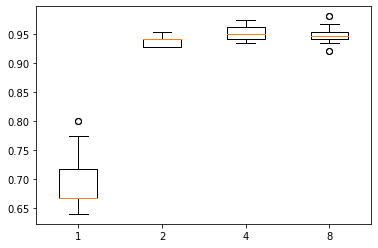

n_estimators


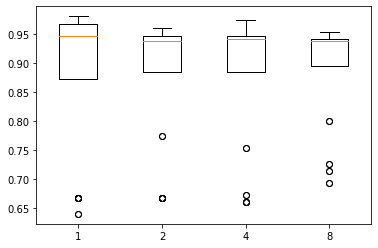

bootstrap


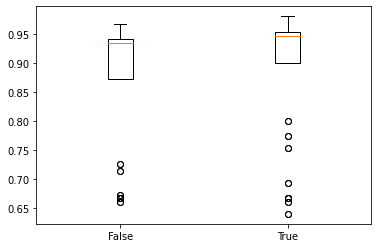

max_features


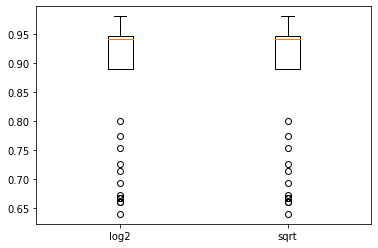

criterion


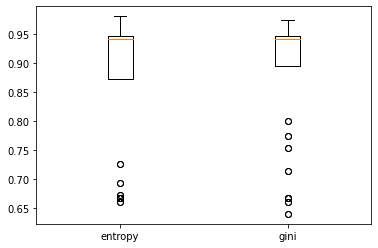

In [3]:
from pandas.core.groupby.groupby import GroupBy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

params = pd.DataFrame(gscv.cv_results_['params'])
scores = pd.DataFrame(gscv.cv_results_['mean_test_score']).rename(columns={0: 'score'})
dataframe = params.join(scores)
for key in parameters.keys():
  print(key)
  groups = dataframe.groupby([key])
  param_list=[]
  score_list=[]
  for param in groups.groups.keys():
    df=dataframe.iloc[groups.groups[param]]

    scores=np.asarray(df['score'])
    param_list.append(param)
    score_list.append(scores)

  ###plot
  plt.boxplot(score_list,labels=param_list)
  plt.show()